In [56]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from pathlib import Path

In [57]:
dataset = Path('./dataset/')

In [58]:
pokemon2label = {}
label2pokemon = {}
index = 0

In [59]:
for pokemon in dataset.glob('*'):
    pok_str = str(pokemon).split('/')[-1]
    pokemon2label[pok_str] = index
    label2pokemon[index] = pok_str
    index+=1

In [60]:
print(pokemon2label)
print(label2pokemon)

{'Meowth': 0, 'Psyduck': 1, 'Charizard': 2, 'Bulbasaur': 3}
{0: 'Meowth', 1: 'Psyduck', 2: 'Charizard', 3: 'Bulbasaur'}


In [61]:
pokemons = []
labels = []

In [62]:
for pokemon in dataset.glob('*'):
    pok = Path(pokemon)
    pok_str = str(pokemon).split('/')[-1]
    for i in pok.glob('*'):
        img = image.load_img(str(i),target_size=(40,40,3))
        img = image.img_to_array(img)
        pokemons.append(img)
        labels.append(pokemon2label[pok_str])

In [63]:
pokemons = np.array(pokemons)
labels = np.array(labels)

In [64]:
print(pokemons.shape)
print(labels.shape)

(570, 40, 40, 3)
(570,)


In [65]:
zipped_data = zip(pokemons,labels)

In [66]:
from sklearn.utils import shuffle

In [67]:
zipped_data = shuffle(list(zipped_data))

In [68]:
pokemons,labels = zip(*zipped_data)

In [69]:
pokemons = np.array(pokemons)
labels = np.array(labels)

print(pokemons.shape)
print(labels.shape)

(570, 40, 40, 3)
(570,)


In [70]:
pokemons = pokemons/255  ## normalisation

Psyduck


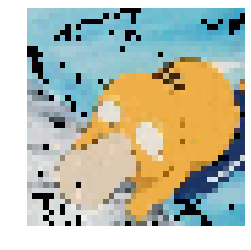

Bulbasaur


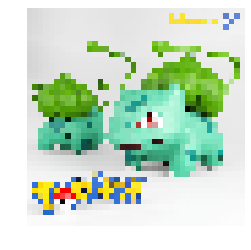

Meowth


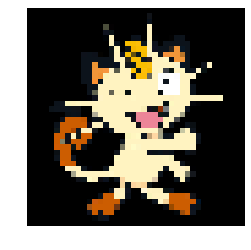

Bulbasaur


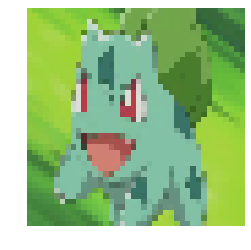

Bulbasaur


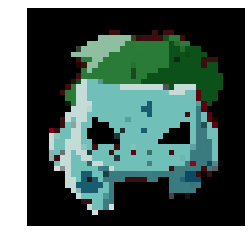

Bulbasaur


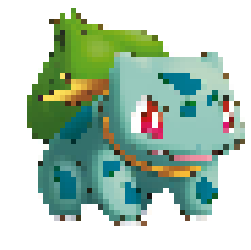

Psyduck


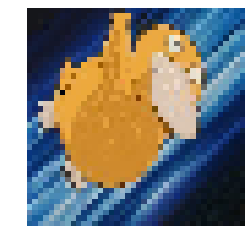

Bulbasaur


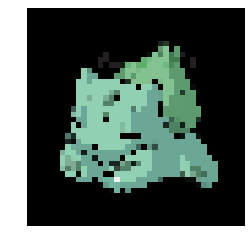

Bulbasaur


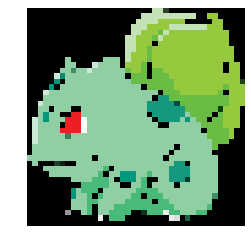

Charizard


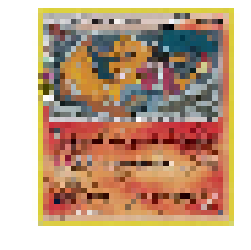

In [87]:
for i in range(10):
    plt.axis('off')
    ran = np.random.randint(0,570)
    pokemon = label2pokemon[labels[ran]]
    print(pokemon)
    plt.imshow(pokemons[ran])
    plt.show()